# Step 1 - Introduction
Lead a discussion with the students that uncludes the following points:


**Energy Output (Brightness) and Filters**
* Stars give off different amounts of energy that causes them to have different brightnesses.
* We measure the energy output by drawing a circle around the star and "adding up" all the light inside it.
* The LSST telescope takes pictures using six different wavelength filters, because objects give off different amounts of energy at different wavelengths. The `u g r i z y` are the names of the different filters that LSST uses when it's taking pictures.

**Estimating Temperatures**
* We have already talked about the blackbody emission curve. The key thing is a star always emits a spectrum of light of different colors in a characteristic shape, and the peak wavelength of that shape is directly related to the star's temperature (Wein's Law).
* Using all the LSST filters, we can estimate the wavelength at the peak of its blackbody curve, and then we know its temperature.
* To figure out the shape of the blackbody curve we need to take measurements using the `u g r i z y` filters and plot them on an energy output versus wavelength graph.

In [12]:
import astropy # Actual Energy Output (units?) vs Wavelength(nm) graph

* We use these measurements to plot a blackbody emission curve so it fits those points.
* This lets us estimate the peak wavelength of the star and its temperature.

# Step 2 - Overview
Give the students an overview of the data they'll be working with.

**Overview**
* Today we're going to be doing this for a while bunch of stars. Each of you will get a patch of sky to work with and we'll find the brightness and temperature for as many stars as we can.
* Afterwards we're going to look at our data and see if we can find any patterns. I hope you'll be pleased to find that even with these simple measurements we can learn a lot about the different types of stars.

For NDOF =  2 , mean = 1.939  and variance = 3.227
For NDOF =  10 , mean = 10.135  and variance = 21.696
For NDOF =  50 , mean = 50.564  and variance = 101.765


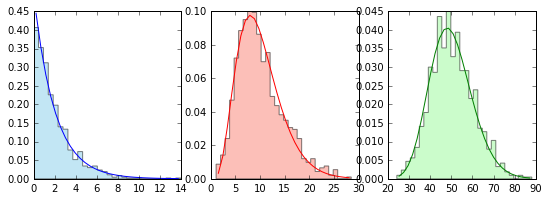

In [1]:
%matplotlib inline

import numpy as np
import math as mt
import matplotlib.pyplot as plt

def probchisq(x,ndof):  #pdf for chi-squared
    return 0.5*np.power(x/2,ndof/2.0-1)*np.exp(-x/2.0)/mt.gamma(ndof/2.0)

nbins = 30
x1=np.zeros(nbins)
x2=np.zeros(nbins)
x3=np.zeros(nbins)

ndof1 = 2
ndof2 = 10
ndof3 = 50

xdata1 = np.random.chisquare(ndof1,1000)
xdata2 = np.random.chisquare(ndof2,1000)
xdata3 = np.random.chisquare(ndof3,1000)

xmean1 = xdata1.mean()
xsig1 = xdata1.std()
xvar1 = xsig1*xsig1

xmean2 = xdata2.mean()
xsig2 = xdata2.std()
xvar2 = xsig2*xsig2

xmean3 = xdata3.mean()
xsig3 = xdata3.std()
xvar3 = xsig3*xsig3

print('For NDOF = ',ndof1,', mean = %5.3f'%xmean1,' and variance = %5.3f'%xvar1)
print('For NDOF = ',ndof2,', mean = %5.3f'%xmean2,' and variance = %5.3f'%xvar2)
print('For NDOF = ',ndof3,', mean = %6.3f'%xmean3,' and variance = %7.3f'%xvar3)

plt.figure(1,figsize=(9,3))
plt.subplot(131)
counts,bins,patches = plt.hist(xdata1,nbins,normed=True,histtype='stepfilled',facecolor='skyblue',alpha=0.5)

for i in range(len(bins)-1):
    x1[i] = 0.5*(bins[i]+bins[i+1])
    
plt.plot(x1,probchisq(x1,ndof1),'b')

plt.subplot(132)
counts,bins,patches = plt.hist(xdata2,nbins,normed=True,histtype='stepfilled',facecolor='salmon',alpha=0.5)

for i in range(len(bins)-1):
    x2[i] = 0.5*(bins[i]+bins[i+1])
    
plt.plot(x2,probchisq(x2,ndof2),'r')

plt.subplot(133)
counts,bins,patches = plt.hist(xdata3,nbins,normed=True,histtype='stepfilled',facecolor='palegreen',alpha=0.5)

for i in range(len(bins)-1):
    x3[i] = 0.5*(bins[i]+bins[i+1])
    
plt.plot(x3,probchisq(x3,ndof3),'g')